In [2]:
# How does inflow and outflow compare among the top 10 biggest companies by population?
# Which sectors have the highest inflow and outflow rates?
# What about regions?

# Importing libraries
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

In [16]:
# Importing data set
master_data = pd.read_csv("companyData.csv")

In [88]:
# Finding top 10 companies by population
group_data = master_data.groupby(['company'])['count'].sum()
group_data = group_data.sort_values(ascending=False)

# If we were to disregard rows with both inflow and outflow as 0, this is how I would do it
# clean_data = master_data.loc[master_data['inflow'] + master_data['outflow'] != 0]

# Populate dataframe df with information about the inflow and outflow of the top 10 companies
df = pd.DataFrame(index = range(10), columns = ['company','inflow','outflow'])
for i in range(10):
    df['company'][i] = group_data.keys()[i]
    df['inflow'][i] = master_data[master_data['company'] == df['company'][i]]['inflow'].mean()
    df['outflow'][i] = master_data[master_data['company'] == df['company'][i]]['outflow'].mean()

# Compare the inflows and outflows of the top 10 companies against the average inflows and outflows total
print(df.head(10))
print()
print("The average inflow of all the data is " + str(master_data['inflow'].mean()))
print("The average outflow of all the data is " + str(master_data['outflow'].mean()))
print()
print("The average inflow of the top 10 companies is " + str(df['inflow'].mean()))
print("The average outflow of the top 10 companies is " + str(df['outflow'].mean()))

                                       company     inflow    outflow
0                                   Tata Group  11.997465   9.351242
1                             Amazon.com, Inc.  21.459553   13.74666
2                                  Walmart Inc   8.617309   8.412122
3  International Business Machines Corporation   9.005131   8.201792
4                                Accenture PLC  14.696653  12.182313
5                        MICROSOFT CORPORATION   8.632131    6.30182
6                                Alphabet Inc.   7.159571   4.499759
7                     General Electric Company   5.008355   5.331082
8                                         AT&T   3.103129   3.687478
9                                   Siemens AG   5.430383   4.618418

The average inflow of all the data is 3.8572980205644627
The average outflow of all the data is 3.306924027926613

The average inflow of the top 10 companies is 9.510967823563131
The average outflow of the top 10 companies is 7.633268677135

The average inflow and outflow of the top 10 companies is significantly greater than the average inflow and outflow across all the data, suggesting that bigger companies might have higher inflow and outflow rates.

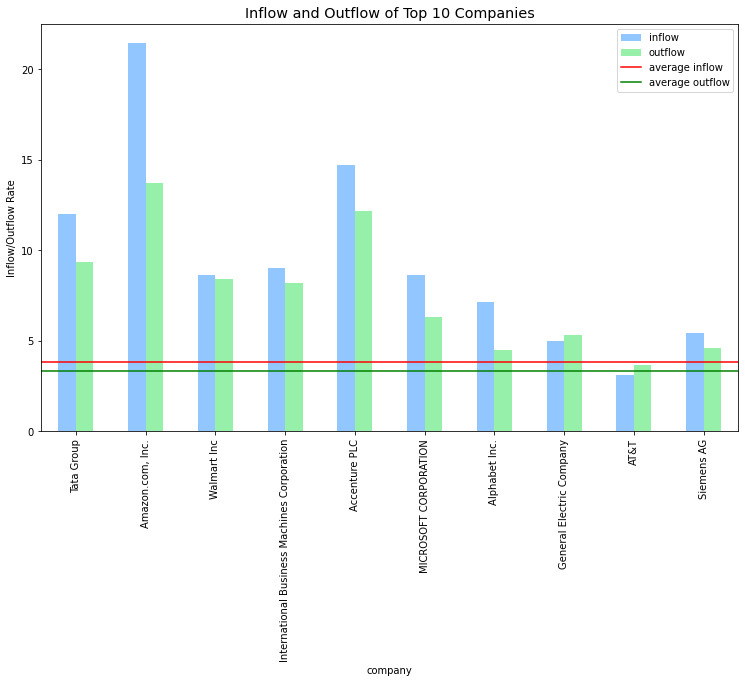

In [141]:
# Initializing pyplot subplots and setting the size so the graph is more readable
fig, ax = plt.subplots()
fig.set_size_inches(12.5,7.5)

# Creating the graph
with plt.style.context('seaborn-pastel'):
    df.plot(x='company',y=['inflow','outflow'], ax=ax, kind='bar')
plt.ylabel("Inflow/Outflow Rate")
plt.title("Inflow and Outflow of Top 10 Companies", fontsize='x-large')

# Adding average inflow and outflow levels to the graph and to the legend
ax.axhline(y=master_data['inflow'].mean(), color='red')
ax.axhline(y=master_data['outflow'].mean(), color='green')
handles, labels = ax.get_legend_handles_labels()
red_line = mpl.lines.Line2D([],[], color='red', label = 'average inflow')
green_line = mpl.lines.Line2D([],[], color='green', label = 'average outflow')
handles.append(red_line)
handles.append(green_line)
ax.legend(handles = handles)

Here we can see the visualization of the data, and all the top 10 companies excluding AT&T have higher inflow and outflow rates

In [179]:
# Which sectors have the highest inflow and outflow rates?

# Summing the count, inflow, and outflow for the different sectors
sector_data = master_data[['sector', 'count', 'inflow', 'outflow']]
sector_data = sector_data.groupby(['sector']).sum()

# Adding new columns to the dataframe representing the inflow and outflow rates divided by the count
inflow_rates = []
outflow_rates = []
for i in range(len(sector_data)):
    rate = sector_data['inflow'][i] / sector_data['count'][i]
    inflow_rates.append(rate)
    
    rate = sector_data['outflow'][i] / sector_data['count'][i]
    outflow_rates.append(rate)

sector_data['inflow/count'] = inflow_rates
sector_data['outflow/count'] = outflow_rates

# Adding average to dataframe which will be used to order the sectors when graphing
average = []
for i in range(len(inflow_rates)):
    average.append((inflow_rates[i] + outflow_rates[i]) / 2)
sector_data['average'] = average
sector_data = sector_data.sort_values(['average'])
sector_data.head()

,count,inflow,outflow,inflow/count,outflow/count,average
sector,,,,,,
Industrials,1.173501e+08,1.482870e+06,1.363383e+06,0.012636,0.011618,0.012127
Consumer Staples,8.340887e+07,1.087844e+06,1.023964e+06,0.013042,0.012276,0.012659
Communication,1.073403e+08,1.531441e+06,1.354954e+06,0.014267,0.012623,0.013445
Financials,9.223354e+07,1.366574e+06,1.224684e+06,0.014816,0.013278,0.014047
Information Technology,2.786478e+08,4.599200e+06,3.777054e+06,0.016505,0.013555,0.015030


Text(0.5, 1.0, 'Inflow and Outflow of Different Sectors')

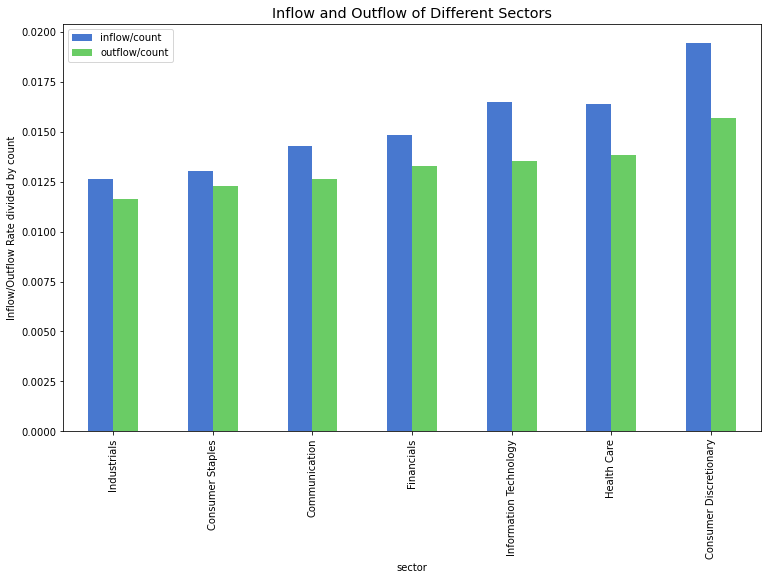

In [173]:
# Initializing pyplot subplots and setting the size so the graph is more readable
fig, ax = plt.subplots()
fig.set_size_inches(12.5,7.5)

# Creating a visual representation of the data
with plt.style.context('seaborn-muted'):
    sector_data.plot(y=['inflow/count','outflow/count'], ax=ax, kind='bar')
plt.ylabel("Inflow/Outflow Rate divided by count")
plt.title("Inflow and Outflow of Different Sectors", fontsize='x-large')

With this data visualization, it appears that the Consumer Discretionary sector has the highest inflow and outflow rates, and that the Industrials sector has the lowest

In [194]:
# Which regions have the highest inflow and outflow rates?
region_data = master_data[['region', 'count', 'inflow', 'outflow']]
region_data = region_data.groupby(['region']).sum()
region_data = region_data.drop('empty')

# Adding new columns to the dataframe representing the inflow and outflow rates divided by the count
inflow_rates = []
outflow_rates = []
for i in range(len(region_data)):
    rate = region_data['inflow'][i] / region_data['count'][i]
    inflow_rates.append(rate)
    
    rate = region_data['outflow'][i] / region_data['count'][i]
    outflow_rates.append(rate)

region_data['inflow/count'] = inflow_rates
region_data['outflow/count'] = outflow_rates

# Adding average to dataframe which will be used to order the sectors when graphing
average = []
for i in range(len(inflow_rates)):
    average.append((inflow_rates[i] + outflow_rates[i]) / 2)
region_data['average'] = average
region_data = region_data.sort_values(['average'])

Text(0.5, 1.0, 'Inflow and Outflow of Different Region')

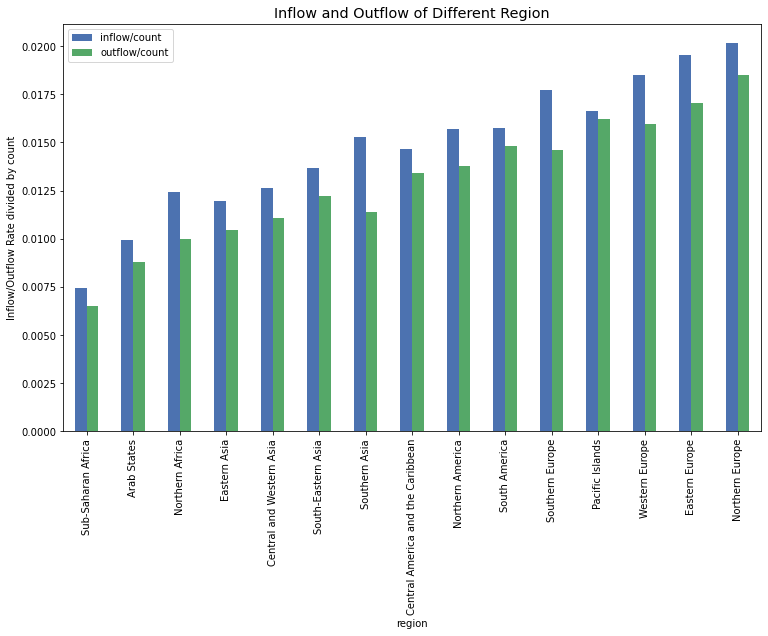

In [193]:
# Initializing pyplot subplots and setting the size so the graph is more readable
fig, ax = plt.subplots()
fig.set_size_inches(12.5,7.5)

# Creating a visual representation of the data
with plt.style.context('seaborn-deep'):
    region_data.plot(y=['inflow/count','outflow/count'], ax=ax, kind='bar')
plt.ylabel("Inflow/Outflow Rate divided by count")
plt.title("Inflow and Outflow of Different Region", fontsize='x-large')

With this data visualization, it appears that Northern Europe has the highest levels of inflow and outflow, whereas Sub-Saharan Africa has the lowest.

## In this data set, it is possible that inflow and outflow rates increase with population, because the top 10 companies based on population almost all had significantly higher inflow and outflow rates compared to the average across the entire data set. 

## Furthermore, it also appears that inflow and outflow rates fluctuate based on region and sector, with the Northern Europe region and the Consumer Discretionary industry being the respective regions and sectors with the highest inflow and outflow rates, and the Sub-Saharan Africa region and the Industrials sector with the lowest